# Benjamin BENTEKE
## AIMS-SENEGAL 2019-2020
### TRAVAIL PRATIQUE INDIVIDUEL

# CREATION D'UN MODEL DE REGRESSION LINEAIRE AVEC DE NUMPY

In [137]:
import numpy as np
from sklearn.datasets import make_regression # Permet de generer les données de maniere aléatoire dans scikit learn
import matplotlib.pyplot as plt

# STEP 1: DATASET

In [138]:
x,y=make_regression(n_samples=100, n_features=1, noise=10) # on cree deux tableaux: x et y donc (x,y) notre dataset

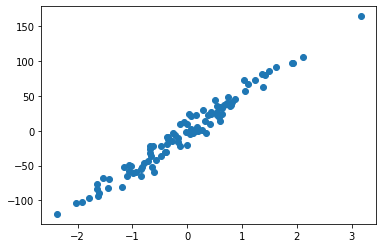

In [139]:
plt.scatter(x,y)

### Verification de la dimension de matrice

In [140]:
print(x.shape,y.shape)

(100, 1) (100,)


##### Il faut redimensionner y

In [141]:
y=y.reshape(y.shape[0],1) # y.shape[0] veut dire nombre de lignes de y

In [142]:
print(x.shape)
print(y.shape)

(100, 1)
(100, 1)


## Creation de la matrice X

In [166]:
np.random.seed(2)
X=np.hstack((x,np.ones(x.shape)))
print(X.shape)
print(X[:10])

(100, 2)
[[-2.37440268  1.        ]
 [-0.72187973  1.        ]
 [ 0.29243207  1.        ]
 [-0.83451521  1.        ]
 [-0.65354144  1.        ]
 [ 0.15908849  1.        ]
 [-1.45535944  1.        ]
 [-1.65220029  1.        ]
 [ 1.0281849   1.        ]
 [ 0.06612642  1.        ]]


In [144]:
theta=np.random.randn(2,1) # un vecteur aléatoire normale
print(theta.shape)
print(theta)

(2, 1)
[[-0.41675785]
 [-0.05626683]]


# STEP 2 CREATION OF LINEAR MODEL

In [145]:
def model(X,theta):
    return X.dot(theta) # produit matricel entre X et theta

### Test de la fonction model

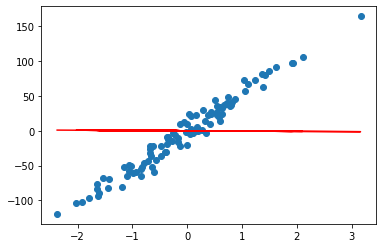

In [146]:
#model(X,theta)
plt.scatter(x,y)
plt.plot(x,model(X,theta),c='r') # car la pente est negatives

# STEP 3 FONCTION COUT

In [147]:
def cost_function(X,y,theta):
    m=len(y)
    return 1/(2*m)*np.sum((model(X,theta)-y)**2)
    

In [148]:
cost_function(X,y,theta) # On veut que cost_function tende vers 0

1457.1708802789738

# STEP 4 GRADIENTS GRADIENT DESCENT

In [149]:
def grad(X,y,theta):
    m=len(y)
    return (1/m)*np.transpose(X).dot(model(X,theta)-y)

In [158]:
def gradient_desc(X,y,theta,learnin_rate,n_iterations):
    
    cost_history=np.zeros(n_iterations)
    
    for i in range(0,n_iterations):
        theta=theta-learnin_rate*grad(X,y,theta)
        cost_history[i]=cost_function(X,y,theta)
        
    return theta,cost_history

### Comments:

# STEP 5  ENTRAINEMENT DU MODEL

### Machine learning

In [159]:
theta_final,cost_history=gradient_desc(X,y,theta,learnin_rate=0.01,n_iterations=1000)
theta_final

array([[53.32755701],
       [-0.51390687]])

## Test dans le model pour le theta_final obtenu

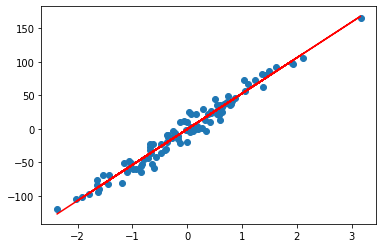

In [160]:
predictions=model(X,theta_final)
plt.scatter(x,y)
plt.plot(x,predictions,c='r')

### Comments:

## comments

# STEP 6 COURBE D'APPRENTISSAGE

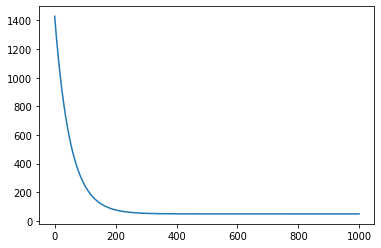

In [162]:
plt.plot(range(1000),cost_history)

### Comments:

# COEFFICIENT DE DETERMINATION

In [164]:
def coef_determination(y,pred):
    u= ((y-pred)**2).sum()  # La somme de carrées residuelles ou le residus de la somme de carrées
    v= ((y-y.mean())**2).sum() # La somme total
    return 1-u/v

In [165]:
coef_determination(y,predictions)

0.9661432842450565

# FIN